<h1><center>Laboratorio 10: Interpretabilidad (Recuperativo) 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla y Ignacio Meza D.
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias y Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Juan Carlos Cuevas P.


### **Link de repositorio de GitHub:** `https://github.com/elsotac/Laboratorios`

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(4)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0


In [2]:
df.nunique()

Age                     13
Sex                      2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Stroke                   2
HighBP                   2
Diabetes                 2
dtype: int64

## 2. Clasificación de pacientes con diabetes (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

In [3]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.metrics import classification_report


target = df.Diabetes
df = df.drop(columns='Diabetes')

#  definimos el column transformer para escalar las variables numéricas
prep =  ColumnTransformer(transformers=[('scale', MinMaxScaler(), df.columns)
                                        ])

#  generamos un pipeline con el column transformer y el entrenamiento del modelo
pipeline = Pipeline(steps=[('prep', prep),
                           ('clf', XGBClassifier())])

#  separamos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

#  entrenamos los modelos
pipeline.fit(X_train, y_train)

#  predecimos sobre el conjunto de test
y_pred = pipeline.predict(X_test)

#  evaluamos los modelos
print('Modelo XGBoost')
print(classification_report(y_test, y_pred))

Modelo XGBoost
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      7090
         1.0       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



En primer lugar notamos que la mayoría de las columnas tiene solo 2 posibles valores, por lo que para el preprocesamiento se escogió un `MinMaxScaler()` que permite conservar esta propiedad mientras que trabajaba sobre las columnas necesarias solamente. El resto del proceso sigue la linea de un entrenamiento estándar: separar el conjunto en entrenamiento y test a una proporción de 80-20, se entrena la pipeline y se realizan las predicciones que son evaluadas usando las métricas usuales: precision, recall y f1-score mediante el uso de la función `classification_report` de `sklearn.metrics`.

En general el predictor es bueno considerando que todas sus métricas estan por sobre el 0.7, sin embargo, es necesario ver que el problema que se está abordando es de carácter médico, por lo que en estas situaciones es necesario tener especial consideración cuando se enfrenta a falsos negativos, es decir, predecir no diabetes cuando en verdad si hay diabetes, con esto en mente buscamos un modelo que tenga un recall alto y un f1-score alto, esto nos permitiría tener un modelo relativamente bueno tanto en precisión como en recall a través de un f1-score alto manteniendo especial cuidado en los falsos negativos a través del alto recall.

En este punto vemos que a pesar de obtener métricas relativamente buenas, no se sabe cuales pueden ser las causas (es decir, las features) que pueden estar haciendo que el modelo tome sus decisiones, por lo que es necesario un feature importance analysis.

## 3. Importancia de las features con XGBoost (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

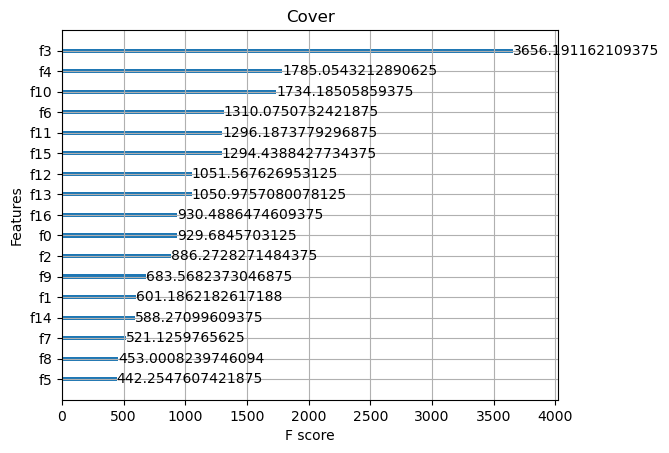

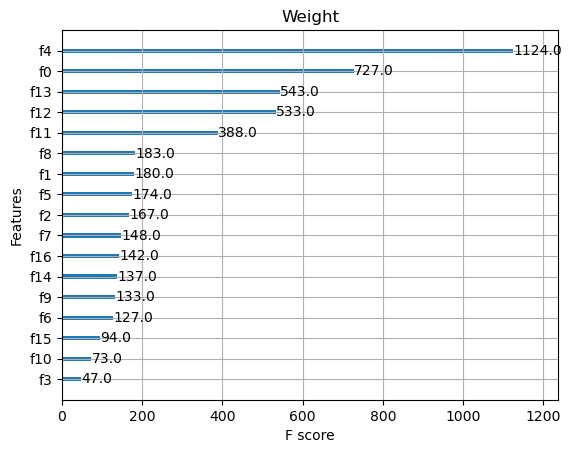

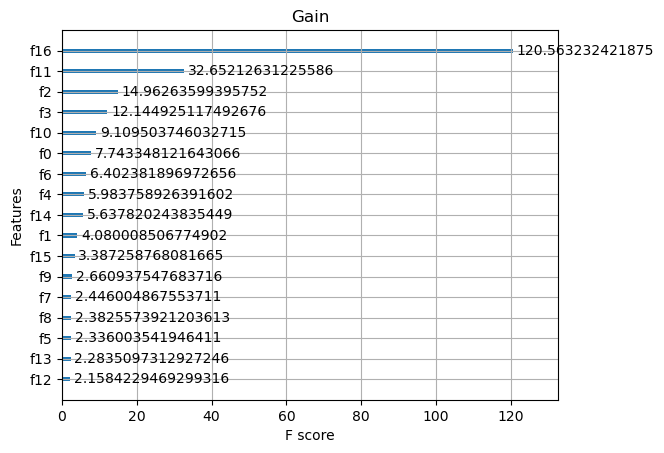

In [4]:
#  importar plot impotance
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(pipeline.named_steps['clf'].get_booster() , importance_type='cover' , title='Cover')
xgb.plot_importance(pipeline.named_steps['clf'].get_booster() , importance_type='weight', title='Weight')
xgb.plot_importance(pipeline.named_steps['clf'].get_booster() , importance_type='gain', title='Gain')
plt.show()

Luego de realiza el plot_importance para los distintos métodos se puede ver que los resultados no son, en general, compatibles. Esto se puede ver entre las primeras features de cada gráfico ya que, aunque hay algunas que se repiten en los primeros puestos, no ocupan un lugar definido en ningun caso. 

Esto se puede deber a la forma en la que se aplica cada método, ya que a pesar de que todos sirven para evaluar las features en modelos basados en árboles, estos miden distintas cosas:

*  Weight: este método se encarga de ver cuantas veces aparece una feature en el árbol.
*  Cover: si se define un cubrimiento (coverage) como el número de muestras afectadas por el split de una feature, entonces este método mide el promedio de cubrimientos que usan esta feature.
*  Gain: es la ganancia promedio de los splits que usan la feature.

En este sentido, a medida que se agranda la cantidad de features a procesar estos métodos se vuelven ineficientes puesto que naturalmente habrán más divisiones a medida que aumentan las features, por lo que podrían no ser suficientes para generar una buena interpretabilidad del modelo. Además, otra cosa que no tienen en consideración estos métodos es el hecho de que una feature puede afectar tanto positiva como negativamente el valor de una predicción, por lo que es necesario tener más opciones para realizar una mejor interpretación del modelo.

## 4. Métodos Agnósticos Globales (1 pt)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

In [5]:
from sklearn.inspection import permutation_importance

result = permutation_importance(pipeline.named_steps['clf'], X_test, y_test, n_repeats=30, random_state=42)

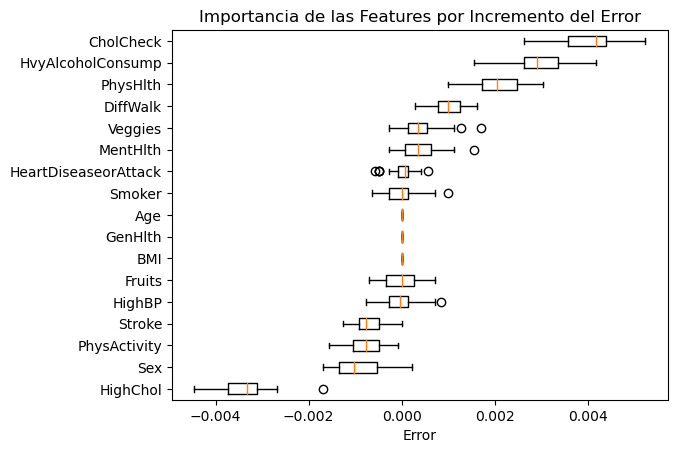

In [6]:
perm_sorted_idx = result.importances_mean.argsort()
plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=np.array(df.columns[perm_sorted_idx],
))

plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()

- ¿Cómo mide la importancia de las features su propuesta?

El método consiste en permutar aleatoriamente los valores de algunas características y cuantificar la variación en las métricas de evaluación, siendo más importante una feature mientras más varia la métrica cuando se permuta su valor.

- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?

De acuerdo a los resultados obtenidos se tiene que las 5 features más importantes son: CholCheck, HvyAlcoholConsump, PhysHlt, DiffWalk y Veggies.
De esto se puede decir que algunas features tienen sentido, como lo son HvyAlcoholConsump, PhysHlt, Veggies y CholCheck, ya que relatan información relacionada a los habitos alimenticios, habitos deportivos y estado de salud de los individuos, cosas que están directamente relacionadas al padecimiento de diabetes, sin embargo, aun queda en duda si es que estas features son las más importantes ya que hay algunas otras que entregan información similar pero podrían ser más útiles al momento de predecir la diabetes en un paciente, como puedens ser la edad, si es que fuma o no, etc.

- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?

El cambio que se puede evidenciar es en la forma en la que se produce el feature importance, en el caso anterior se usaba el propio proceso de construcción del modelo por lo que los resultados son aplicables solo a modelos basados en árboles, sin embargo, en este caso la forma en la que se realiza el feature importance es a través de las métricas de evaluación, las cuales se comparten entre distintos tipos de modelos y por ende pueden ser aplicados en más casos.
Además, como el primer método se basa en la construcción del modelo, al obtener malos resultados de este es dificil saber si es por el uso de alguna feature en particular, mientras que el segundo método se puede evaluar cada feature independiente de la calidad del modelo entrenado puesto que se fija en las variaciones del valor de la métrica más que en el valor mismo.

- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

Ventajas:

* Como ya se mencionó, es posible ocuparlo en varios tipos de modelos puesto que trabaja con las métricas de evaluación y con el conjunto de datos.

* Es fácil de evaluar puesto que muestra cuanta variación aporta modificar cada una de las features.

* Es robusto ante correlaciones entre variables ya que trabaja cada característica por separado.

Desventajas:

* Puede llegar a ser costoso computacionalmente dependiendo del conjunto de datos, a medida que haya más features y más permutaciones el tiempo de ejecución va siendo mayor. 

* Tiene hiperparámetros que es necesario verificar, como son el número de permutaciones realizadas para obtener la importancia. Es decir, dependiendo del tamaño del conjunto de datos habrá que realizar más o menos permutaciones.

* En general su uso está restringido a datos numéricos y tabulares, por lo que features categoricas por ejemplo pueden representar un problema para el método. 


## 5. Métodos Agnósticos Locales (2 pt)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### Parte A (0.4 pt)

In [7]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [8]:
import shap

In [9]:
# Inserte código para calcular shapley values aquí
explainer = shap.TreeExplainer(pipeline.named_steps['clf'])
shap_values = explainer(X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [10]:
shap_values.values.shape

(56553, 17)

In [11]:
shap_values.values[0]

array([ 0.40556306,  0.15363115, -0.33119538,  0.01774739,  1.3920543 ,
        0.08140364,  0.00513023, -0.029856  ,  0.14305933, -0.06256047,
        0.01820515,  0.8214635 ,  0.09003238,  0.6408867 , -0.11036847,
        0.03235345,  0.35130638], dtype=float32)

Notemos en primer lugar que el resultado obtenido es un `np.array` de dimensiones n_filas x n_columnas, compuesto por valores numericos tanto positivos como negativos. Estos valores representan el aporte que realiza cada feature en cada fila a la predicción del modelo usando esa fila y pueden mostrar, a diferencia de otros métodos, si es que el aporte de esta feature aumenta o disminuye la probabilidad de  predicción de un valor por sobre otro.

### Parte B (0.4 pt)

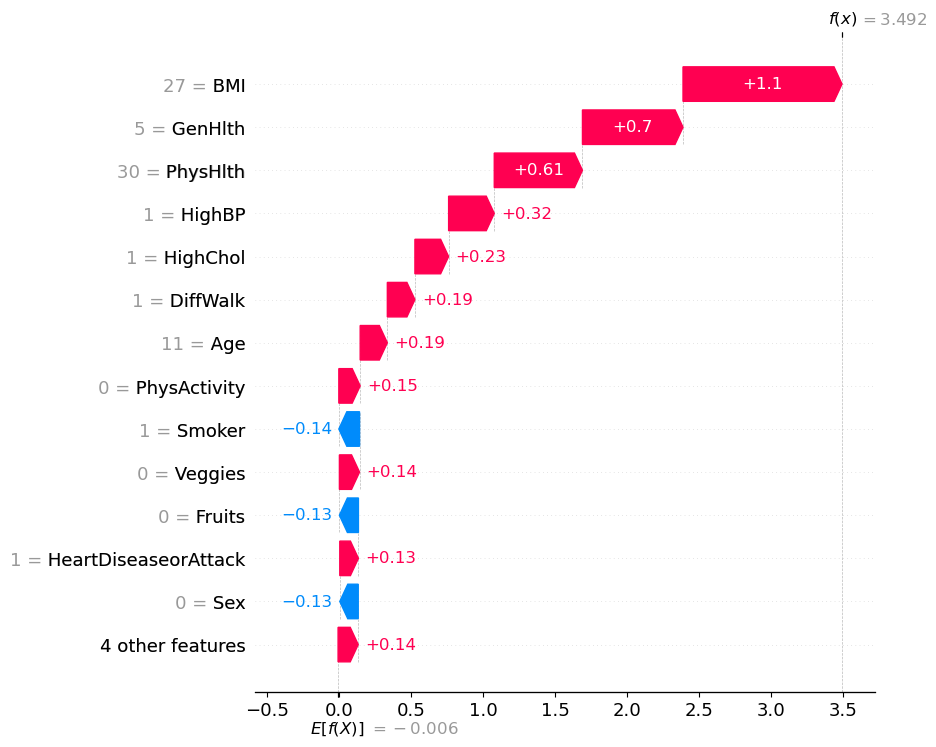

In [12]:
idx = 1

shap.plots.waterfall(shap_values[idx,:], 
                     max_display=14)

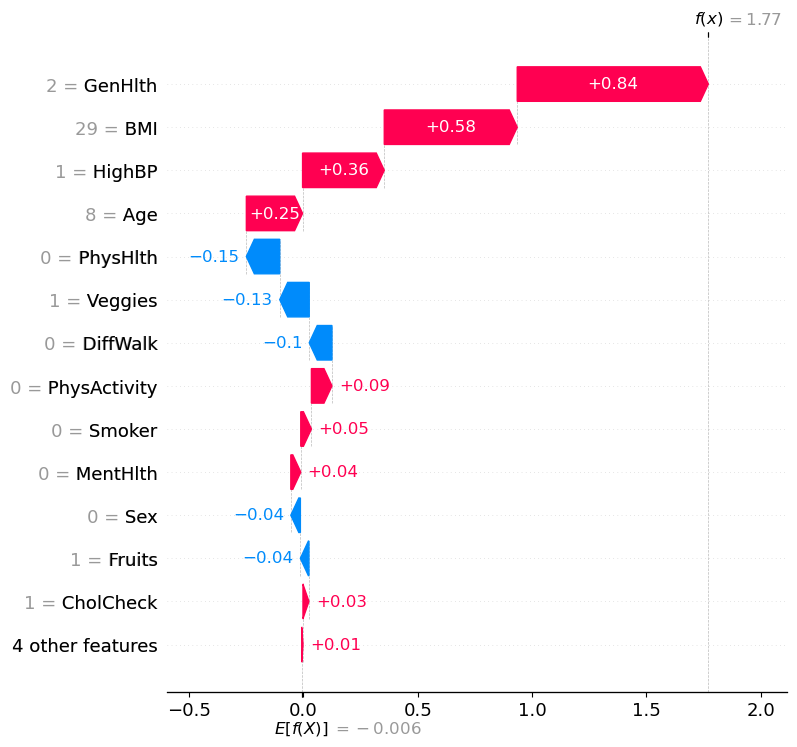

In [13]:
idx = 9

shap.plots.waterfall(shap_values[idx,:], 
                     max_display=14)

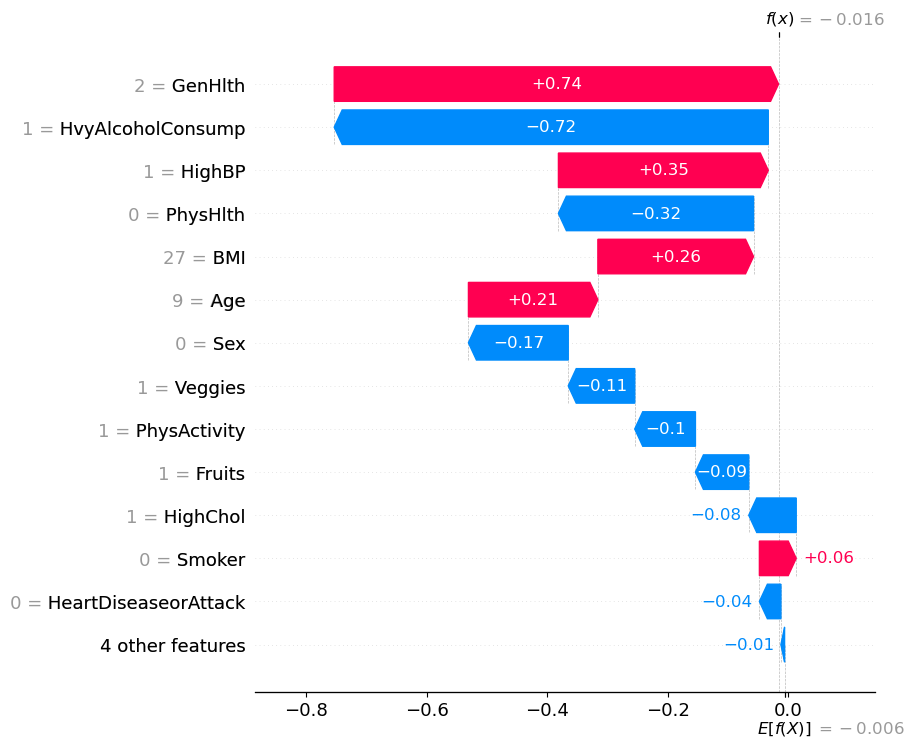

In [14]:
idx = 150

shap.plots.waterfall(shap_values[idx,:], 
                     max_display=14)

- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?

De acuerdo a los resultados se puede ver que las variables como: BMI, GenHlth, HighBP y Age afectan positivamente a la probabilidad de poseer diabetes mientras que otras como: Fruits, Veggies y PhysActivity afectan negativamente a la prob. de tener diabetes.

Notemos ademas que estas variables pueden variar su signo dependiendo del individuo (lo que podría indicar algún tipo de correlación con otras variables), pero estas variaciones son muy pequeñas por lo que se encuentran dentro de un rango aceptable. 

- ¿Existe algún patrón común entre las instancias analizadas?

En general aquellas personas cuyos habitos son relativamente saludables (comer frutas, verduras, hacer actividad física, ser joven, etc) tienen una menor probabilidad de padecer diabetes, mientras que aquellas que no, tienen más chances de padecer, lo cual tiene mucho sentido.

Es interesante mencionar el caso N°3, ya que a pesar de tener un alto consumo de alcohol, la prob. de tener diabetes es menor que en los otros casos donde no se aprecia esta característica. Esto se puede deber a que este individuo tiene además una salud relativamente buena, come verduras y frutas y hace deporte.


- ¿Es posible generalizar estas conclusiones a todo el dataset?

Si bien  la explicabilidad usando este método es muy eficaz, no es recomendable generalizar a todo el dataset ya que es posible que estos individuos no sean representativos de la muestra total (ya sea, por ejemplo, por una condición no presente en el conjunto de datos o algún motivo SIMI-lar), en cuyo caso estaríamos hablando de un outlier. Sería buena practica realizar este trabajo para todo el conjunto de datos y realizar alguna especie de promedio entre los valores para ver cuales características tienen influyen más en las decisiones del modelo. 

### Parte C (0.4 pt)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


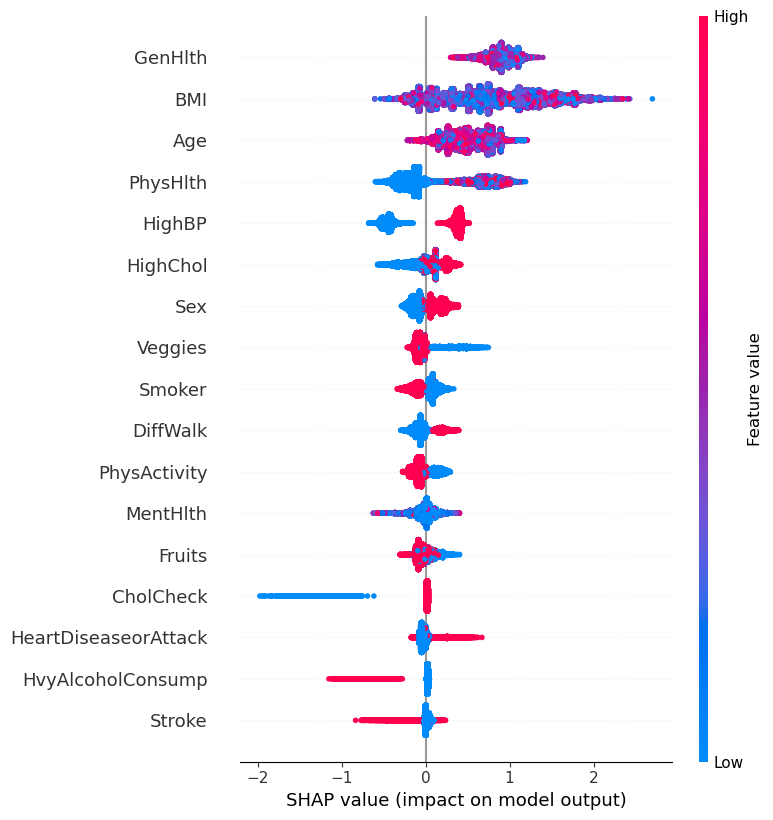

In [15]:
shap.summary_plot(shap_values, X_train)

El gráfico mostrado anteriormente deja en evidencia lo que se habló en la subsección anterior. Los resultados son muy similares, sin embargo, se puede apreciar que las diferencias son en general a nivel de orden de importancia de las features. En el caso individual, el estado de salud de un individuo en particular puede decir que cierta característica es más importante que otra a la hora de predecir la diabetes, no obstante, si se considera una muestra mayor se ve que dicha característica tiene una importancia similar pero resume la informaciónd de más personas. En este caso se ve que la variable más importante es GenHlth, lo que tiene mucho sentido ya que tener una buena salud es sinónimo de menos riesgo de enfermedades de todo tipo, cosa que se ve dentro de los ejemplos de la subsección anterior.

### Parte D (0.4 pt)

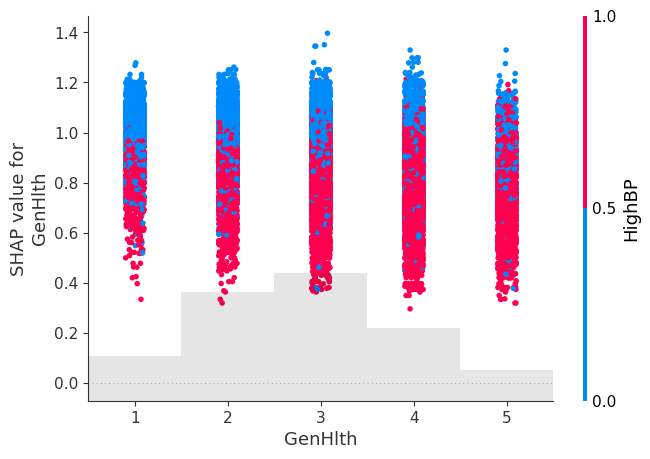

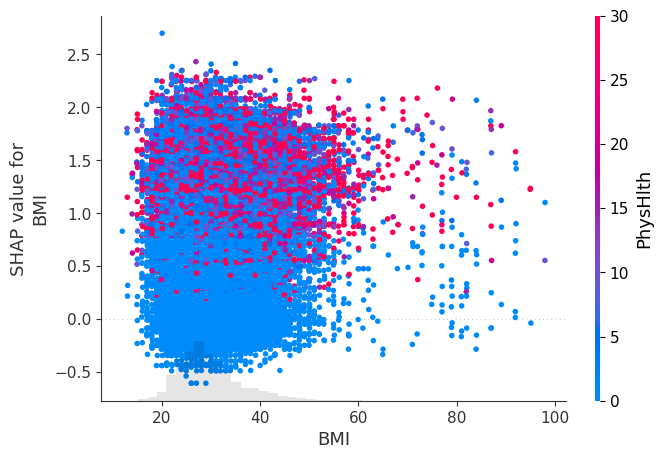

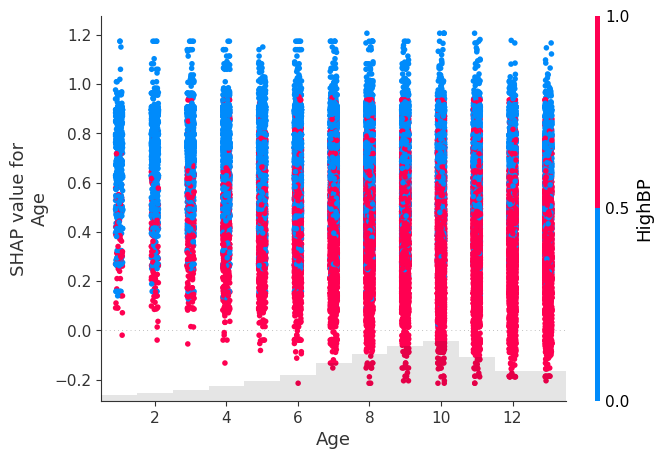

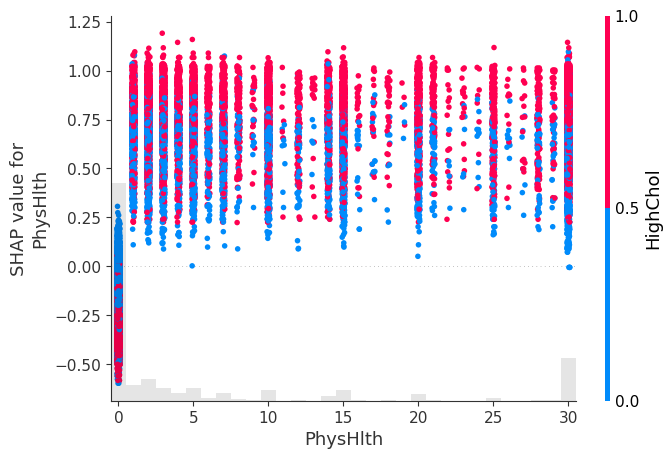

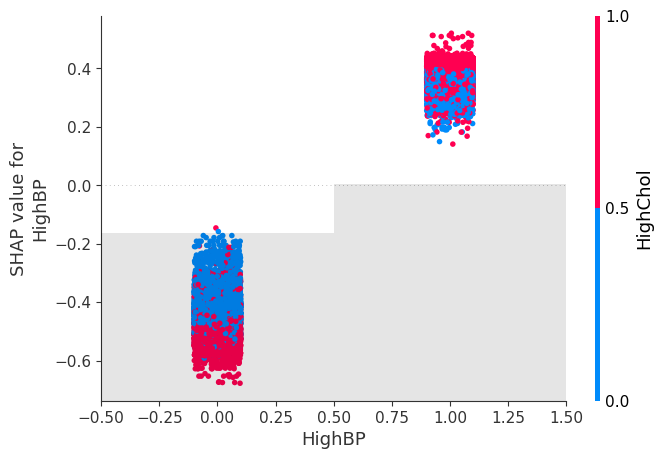

In [16]:
#  obtenemos los shap values
shap_values_abs = np.mean(np.abs(shap_values.values), axis=0)

#  Obtenemos los nombres ordenados de mayor a menor
feature_importance_names = X_train.columns[shap_values_abs.argsort()[::-1]]

for name in feature_importance_names[:5]:
    shap.plots.scatter(shap_values[:,name], color=shap_values)

De estos resultados es interesante notar la variable con la cual se contrasta cada una de las evaluadas, según los docs se SHAP, esta variable es la que tiene mayor interacción con la variable evaluada, y en este caso se puede ver que la variable que tiene mayor interacción con las estudiadas es HighBP, por lo que se puede decir que para poder predecir de mejor manera hay que ver estas variables y relacionarlas con la de HighBP. Fuera de eso los resultados son en general esperados, por ejemplo, a medida que aumenta la edad, los valores de SHAP que antes indicaban una probabilidad de no diabetes ahora indican que es más posible contrar diabetes.

### Parte E (0.4 pt)

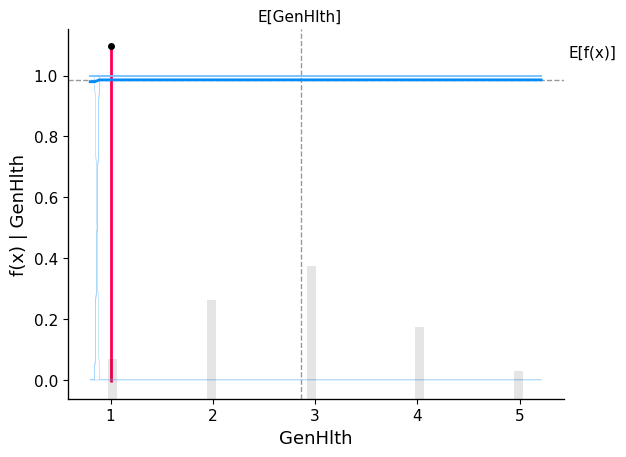

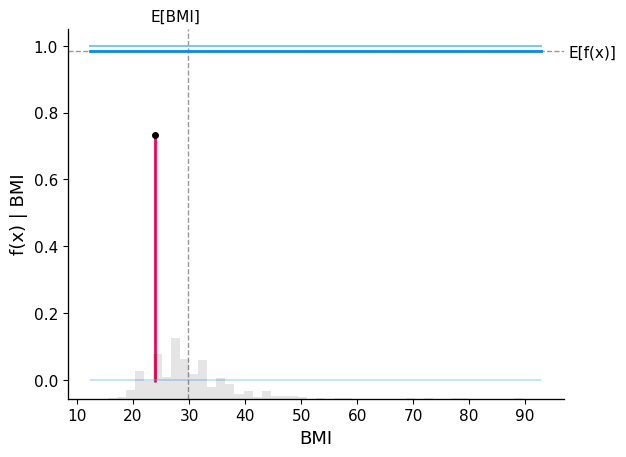

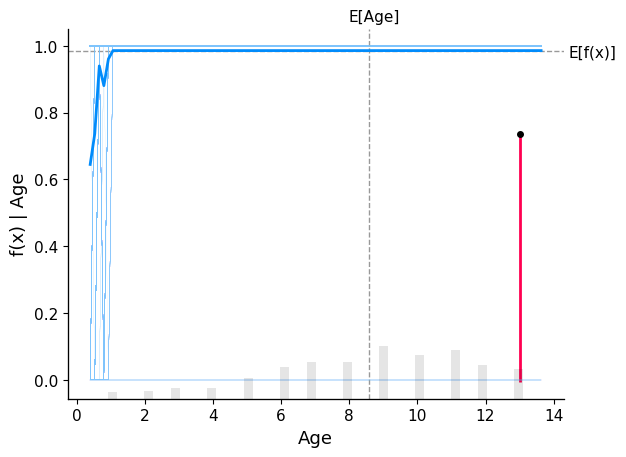

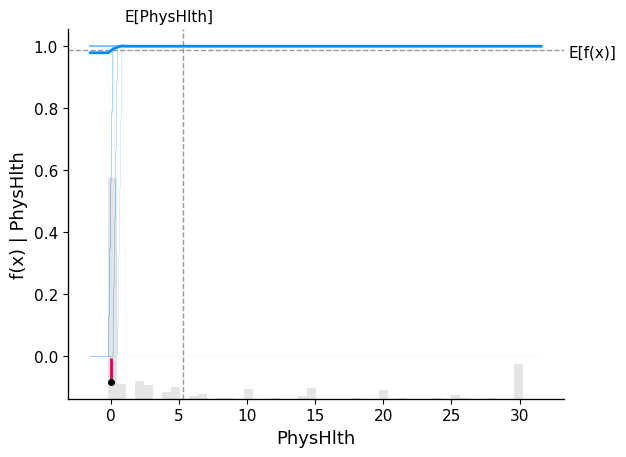

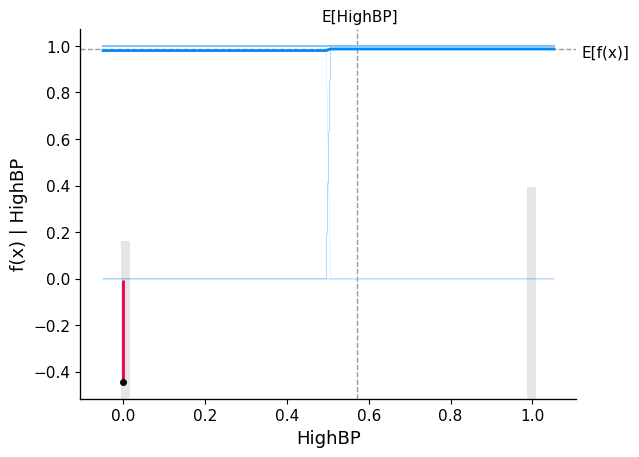

In [17]:
X1000 = shap.utils.sample(X_train, 1000)

sample_ind = 20
for name in feature_importance_names[:5]:
    shap.partial_dependence_plot(
        name, pipeline.named_steps['clf'].predict, X1000, model_expected_value=True,
        feature_expected_value=True, ice=True,
        shap_values=shap_values[sample_ind:sample_ind+1,:]
    )

De acuerdo a lo obtenido se puede ver que la relación entre la salida promedio del modelo y las features analizadas es monótona en la mayor parte de su trayectoria salvo algunos puntos donde se genera un salto hacia otro valor. Adempas, debido a la naturaleza aleatoria del método es posible extrapolar los resultados a otros elementos del conjunto de datos.

## 6. Sistema de Reglas! (1 pt)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [18]:
from alibi.explainers import AnchorTabular

In [19]:
predict_fn = lambda x: pipeline.named_steps['clf'].predict(x)
explainer = AnchorTabular(predict_fn, pipeline.named_steps['prep'].get_feature_names_out(), seed=123)
explainer.fit(X_train.to_numpy())

class_names = ['No Diabetes', 'Diabetes']


#  explicar predicción idx 1000
idx = 1000
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f\n' % explanation.coverage)

#  explicar predicción idx 3001
idx = 3001
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f\n' % explanation.coverage)

#  explicar predicción idx 5751
idx = 5751
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f\n' % explanation.coverage)

Prediction:  Diabetes
Anchor: scale__Sex > 0.00
Precision: 0.99
Coverage: 0.46

Prediction:  Diabetes
Anchor: scale__Smoker > 0.00
Precision: 1.00
Coverage: 0.48

Prediction:  Diabetes
Anchor: scale__Sex > 0.00
Precision: 1.00
Coverage: 0.46



De acuerdo a los resultados obtenidos se puede concluir que las reglas encontradas se pueden aplcicar a toda la población, esto pues se basan en parámetros que se pueden facilmente identificar en cada individuo, además, los resultados obtenidos muestran que las reglas poseen una alta precisión y cubren casi la mitad del conjunto, por lo que se asumen útiles.

Si bien los resultados de las métricas son relativamente buenos, es posible que sea necesario profundizar más en buscar reglas de asociación puesto que las obtenidas son muy simples para identificar una problemática tan compleja como lo es un problema médico.

# Retrospectiva... (1 pt)

De acuerdo a lo expuesto en este laboratorio se concluye que los métodos más útiles para la tarea de clasificación de diabetes son aquellos que usan SHAP values, puesto que no solo tiene incluidas dentro de su catálogo de herramientas otras como PDP sino que además permite el uso de métodos locales y globales. 

Con eso en mente se concluye en particular que la forma más útil de ocupar estos resultados es considerando ambos métodos, ya que los métodos globales generan una instancia que permite esclarecer que el modelo esté funcionando como corresponde, mientras que los metodos locales verifican los pequeños detalles que puede traer consigo los datos pertenecientes a cierto paciente en particular. Esto es pues recordemos que se intenta resolver un problema del tipo médico, por lo que evaluar la condición particular de cada paciente por separados puede ser importante a la hora de definir si es que un paciente tiene o no tiene diabetes. 



# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>